<a href="https://colab.research.google.com/github/tamojit-maiti/upgrad-teaching/blob/main/intro_pandas/Python_%7C_Advanced_Pandas_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><font size="6"><b>Pandas: Working with time series data</b></font></p>


---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# Introduction: `datetime` module

Standard Python contains the `datetime` module to handle with date and time data:

In [ ]:
import datetime

In [ ]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [ ]:
print(dt) # .day,...

2016-12-19 13:30:00


In [ ]:
print(dt.strftime("%d %B %Y"))

19 December 2016


In [ ]:
dt.hour

13

# Dates and times in pandas

## The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [ ]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month:

In [ ]:
ts.month

12

In [ ]:
ts.year

2016

In [ ]:
ts - pd.Timedelta('1 days')

Timestamp('2016-12-18 00:00:00')

### Parsing datetime strings 

Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

from string formatted dates to Timestamp objects: `to_datetime` function
</div>



In [ ]:
pd.to_datetime("2016-/-05-/-09")

Timestamp('2016-05-09 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016", format="%m/%d/%Y")

Timestamp('2016-09-12 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

## `Timestamp` data in a Series or DataFrame column

In [ ]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])

The `to_datetime` function can also be used to convert a full series of strings:

In [ ]:
ts = pd.to_datetime(s)

In [ ]:
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Notice the data type of this series: the `datetime64[ns]` dtype. This indicates that we have a series of actual datetime values.

The same attributes as on single `Timestamp`s are also available on a Series with datetime data, using the **`.dt`** accessor:

In [ ]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [ ]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

In [ ]:
ts.map(lambda x: x.hour)

0    10
1    11
2    12
dtype: int64

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [ ]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
            ...        
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
Length: 10, dtype: datetime64[ns]

# Time series data: `Timestamp` in the index

## River discharge example data

For the following demonstration of the time series functionality, we use a sample of discharge data of the total riverwater in the Flanders region of Belgium with 3 hour averaged values, derived from the [Waterinfo website](https://www.waterinfo.be/).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/flowdata.csv")

In [ ]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      11697 non-null  object 
 1   L06_347   11696 non-null  float64
 2   LS06_347  11425 non-null  float64
 3   LS06_348  10689 non-null  float64
dtypes: float64(3), object(1)
memory usage: 365.7+ KB


We already know how to parse a date column with Pandas:

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      11697 non-null  datetime64[ns]
 1   L06_347   11696 non-null  float64       
 2   LS06_347  11425 non-null  float64       
 3   LS06_348  10689 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 365.7 KB


With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [ ]:
data = data.set_index("Time")

In [ ]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


The steps above are provided as built-in functionality of `read_csv`:

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/flowdata.csv", index_col=0, parse_dates=True)

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

`pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the help of the read_csv function...
</div>

## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [ ]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [ ]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='Time', length=11697)

In [ ]:
data.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
           dtype='int64', name='Time', length=11697)

In [ ]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='Time', length=11697)

The `plot` method will also adapt it's labels (when you zoom in, you can see the different levels of detail of the datetime labels):


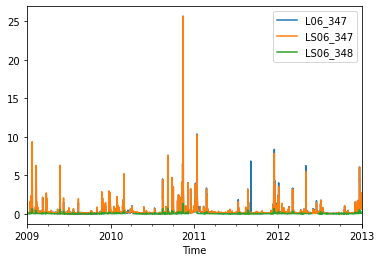

In [ ]:
data.plot()

We have to much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [ ]:
data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


But, for convenience, indexing a time series also works with strings:

In [ ]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [ ]:
data['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Normally you would expect this to access a column named '2013', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

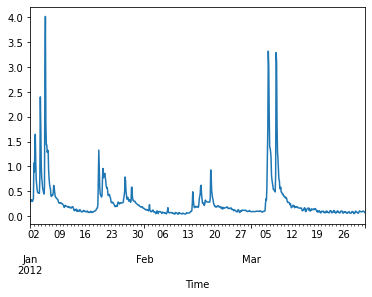

In [ ]:
data['2012-01':'2012-03']['L06_347'].plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data starting from 2012</li>
</ul>
</div>

In [ ]:
data['2012':]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January for all different years</li>
</ul>
</div>

In [ ]:
data.loc[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January, February and March for all different years</li>
</ul>
</div>

In [ ]:
data.loc[(data.index.month == 1) | (data.index.month == 2) | (data.index.month == 3)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


In [ ]:
data.loc[(data.index.month == 1 | 2 | 3 )]

,L06_347,LS06_347,LS06_348
Time,,,
2009-03-01 00:00:00,0.202417,0.157083,0.022417
2009-03-01 03:00:00,0.234250,0.191750,0.023417
2009-03-01 06:00:00,0.185750,0.174500,0.022917
2009-03-01 09:00:00,0.260833,0.222667,0.024417
...,...,...,...
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500
2012-03-31 18:00:00,0.085750,0.121417,0.011000
2012-03-31 21:00:00,0.068417,0.119750,0.010417


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all 'daytime' data (between 8h and 20h) for all days</li>
</ul>
</div>

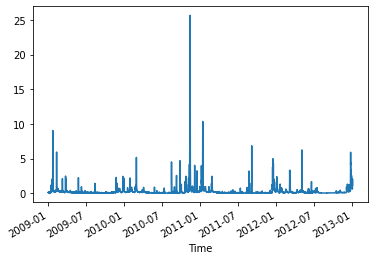

In [ ]:
data.loc[(data.index.hour > 8) & (data.index.hour<20)]['L06_347'].plot()

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [ ]:
data.resample('MS').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.517864,0.536660,0.045597
2009-02-01,0.516847,0.529987,0.047238
2009-03-01,0.373157,0.383172,0.037508
2009-04-01,0.163182,0.129354,0.021356
2009-05-01,0.178588,0.160616,0.020744


<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>with older versions of pandas, <code>data.resample('D').mean()</code> was expressed as <code>data.resample('D', how='mean')</code>.</li>
</ul>
</div>

Other mathematical methods can also be specified:

In [ ]:
data.resample('D').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


In [ ]:
data.resample('A').mean()

,L06_347,LS06_347,LS06_348
Time,,,
2009-12-31,0.219427,0.219074,0.024532
2010-12-31,0.340571,0.360104,0.031055
2011-12-31,0.241405,0.242392,0.018012
2012-12-31,0.228513,0.237368,0.025240
2013-12-31,1.636037,1.636037,0.134731


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the monthly mininum and maximum daily average value of the 'LS06_348' column</li>
</ul>
</div>

In [ ]:
data.resample('MS').LS06_348.agg(['min','max'])

,min,max
Time,,
2009-01-01,0.011000,0.637500
2009-02-01,0.016167,0.432167
2009-03-01,0.011000,0.189667
2009-04-01,0.010917,0.079917
...,...,...
2012-10-01,0.004000,0.112750
2012-11-01,0.008750,0.063667
2012-12-01,0.009583,0.483583
2013-01-01,0.075000,0.207333


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Calculate the typical yearly pattern with monthly resolution for the column `LS06_348`(plot of the typical monthly average over the years)</li>
</ul>

</div>

In [ ]:
data1 = data.resample('MS').mean()
data1['year'] = data1.index.map(lambda x: x.year)
data1['month'] = data1.index.map(lambda x: x.month)
data1.pivot_table(index = 'month', columns = 'year', values = 'LS06_348')

year,2009,2010,2011,2012,2013
month,,,,,
1,0.045597,0.034313,0.043064,0.038977,0.134731
2,0.047238,0.052827,0.031205,0.017845,NaN
3,0.037508,0.070464,0.017783,0.030467,NaN
4,0.021356,0.012225,0.011342,0.018080,NaN
...,...,...,...,...,...
9,0.008322,0.030931,0.009433,0.006407,NaN
10,0.010257,0.035210,0.009215,0.013176,NaN
11,0.022979,0.089383,0.009392,0.013853,NaN
12,0.046088,0.060212,0.058317,0.087823,NaN
